<a href="https://colab.research.google.com/github/IsaacMartindeDiego/Short_Courses/blob/main/SC0_Exploratory_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Exploratorio de Datos**

## **Introducción**

**¿Qué es EDA?**

El Análisis Exploratorio de Datos o (EDA, del inglés "Exploratory Data Analysis") consiste en comprender los conjuntos de datos resumiendo sus características principales, a menudo representándolas visualmente. Este paso es muy importante, especialmente para el siguiente paso, que será modelar los datos para aplicar técnicas de Aprendizaje Máquina. Los gráficos en EDA consisten en histogramas, gráficos de caja, gráficos de dispersión y muchos más. A menudo se necesita mucho tiempo para explorar los datos. Se dice que el *80%* del tiempo del proyecto se gasta en EDA. A través del proceso de EDA, podemos pedir que se defina el enunciado del problema o la definición de nuestro conjunto de datos, lo cual es muy importante. Lo ideal es contar con un objetivo que se haya definido junto con los datos, indicando qué se quiere conseguir a partir de ellos. Por ejemplo, "*predecir las ventas en los próximos 30 días*", "*estimar el riesgo que tiene un paciente de no superar una determinada operación quirúrgica*", "*clasificar como fraudulenta, o no, una página web*", etc.

**¿Cómo se lleva a cabo un EDA?**

La pregunta del millón de dólares. La respuesta es que depende del conjunto de datos con el que se trabaje. No hay un método o métodos comunes para realizar EDA. En este cuaderno presentamos *algunos* métodos comunes que se utilizarían en el proceso de EDA. En cualquier caso, algunas de las primeras preguntas que deberíamos de plantearnos son:

- ¿Cuál es el tamaño de la base de datos?. Es decir:
  - ¿Cuántas observaciones hay?
  - ¿Cuántas variables/características están medidas? 
  - ¿Disponemos de capacidad de cómputo en nuestra máquina para procesar la base de datos o necesitamos más recursos?
  - ¿Existen valores faltantes?
- ¿Qué tipo variables aparecen en la base de datos?
  - ¿Qué variables son discretas?
  - ¿Cuáles son continuas?
  - ¿Qué categorías tienen las variables?
  - ¿Hay variables tipo texto?
- Variable objetivo: ¿Existe una variable de "respuesta"? 
  - ¿Binaria o multiclase?
- ¿Es posible identificar variables irrelevantes?. Estudiar variables relevantes requiere, habitualmente, métodos estadísticos.
- ¿Es posible identificar la distribución que siguen las variables?
- Calcular estadísticos resumen (media, desviación típica, frecuencia,...) de todas las variables de interés.
- Detección y tratamiento de valores atípicos.
  - ¿Son errores de media?
  - ¿Podemos eliminarlos?
- ¿Existe correlación entre variables?








**Datos**

Conjunto de datos sobre coches obtenido de la plataforma Kaggle: [DATOS](https://www.kaggle.com/CooperUnion/cardataset). el conjunto de datos contiene más de 10000 filas y más de 10 columnas que contiene las características del coche como el tipo de combustible del motor, motor de HP, Tipo de Transmisión, carretera MPG, ciudad MPG y muchos más. En este CUADERNO, exploraremos los datos y los prepararemos para el modelado.



---



## **Importamos las librerías necesarias para EDA**

A continuación se muestran las librerías que se utilizan para realizar EDA en este cuaderno.

In [2]:
import pandas as pd
import numpy as np
# visualización
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)



---



# **Cargamos los datos en un data frame**

Cargar los datos en el data frame para su uso posterior es uno de los pasos más importantes en EDA, ya que podemos ver que el valor del conjunto de datos. Así que todo lo que tenemos que hacer es simplemente leer el CSV en un data frame.

In [3]:
# Cargamos los datos
df = pd.read_csv('https://raw.githubusercontent.com/IsaacMartindeDiego/IA/master/datasets/car_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.tail(5)                        # Mostramos las últimas 5 filas del data frame

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995




---



# **Tipos de variables**

Aquí comprobamos los tipos de variables. En ocasiones hay variables numéricas que se almacenan como una cadena de caracteres (y cosas aún más extrañas!!!). En esos casos, tenemos que convertir esa cadena a los datos enteros para poder obtener medidas numéricas y gráficos resumen.

In [5]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

# **Eliminar variables irrelevantes**

Es muy común que existan muchas variables que nunca usamos durante el análisis. Las columnas correspondientes a esas variables han de ser eliminadas. En el problema que nos ocupa, las columnas como el tipo de combustible del motor, la categoría del mercado, el estilo del vehículo, la popularidad, el número de puertas y el tamaño del vehículo no tienen interés según el experto del dominio al que hemos consultado.

In [7]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



# **Renombrar variables**

Una situación muy común durante EDA es encontrar nombres de columnas confusos de leer o sin significado aparente. Es altamente recomendable modificar sus nombres. Este es un buen enfoque que mejora la legibilidad del conjunto de datos.

In [8]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



# **Eliminar filas duplicadas**





Esta tarea depende del conjunto de datos que manejemos. ¿Es posible tener dos filas con, exactamente, los mismos valores? Si la respuesta es no, entonces hemos de eliminar las observaciones repetidas. En este caso se dispone de 11914 observaciones, pero después de eliminar los duplicados se quedan en 10925 datos, lo que significa que tenía 989 datos duplicados.

In [9]:
df.shape

(11914, 10)

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("Número de filas duplicadas: ", duplicate_rows_df.shape)

Número de filas duplicadas:  (989, 10)


Borramos las filas duplicadas.

In [11]:
df.count()      # Used to count the number of rows

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [12]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [13]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64



---



# **Detección de valores faltantes**

Este paso es muy similar al anterior, pero aquí se detectan todos los valores perdidos y se eliminan posteriormente. Es decir, vamos a eliminar del análisis aquellas observaciones con valores faltantes en una o varias de las variables. Este no es la única solución. En ocasiones, se reemplazan los valores faltantes con la media o el promedio de esa variable. Hay que hacer notar que, en este caso, hay cerca de 100 valores perdidos en comparación con 10.000 valores, es un número pequeño y poco relevante, por lo que sólo se eliminan esas observaciones.

In [14]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [15]:
df = df.dropna()    # Eliminando los valores faltantes
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

Comprobamos que hemos borrado todos los valores falantes. Es decir, las filas que contenían valores Null o N/A en las variables Cylinders and Horsepower (HP)).

In [16]:
print(df.isnull().sum())   # Después de eliminar los valores faltantes

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64




---



# **Detección de valores atípicos**

Un valor atípico es una observación o conjunto de observaciones que son muy diferentes del resto de las observaciones de un conjunto de datos. Cuando nos centramos en los valores atípicos de una variable numérica, pueden ser mvalores extremadamente altos o extremadamente bajos. Suele ser una buena idea detectar y tratar los valores atípicos. Los valores atípicos son una de las principales razones por las que se obtiene un modelo menos preciso. En ocasiones se transforma la variable original mediante una transformación adecuada para reducir la influencia (negativa) de los valores atípicos en el rendimiento del modelo final. En otras ocasiones, simplemente, las observaciones con valores atípicos se eliminan de la base de datos. A menudo los valores atípicos se pueden ver con visualizaciones utilizando un gráfico de caja. A continuación se muestran los gráficos de caja de las variables *MSRP*, *Cylinders*, *Horsepower* and *EngineSize*. En todos los gráficos, se encuentran algunos puntos fuera de la caja. Esos son los valores atípicos. La técnica de búsqueda que se realiza aquí se base en un tutorial sobre Ciencia de datos:[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

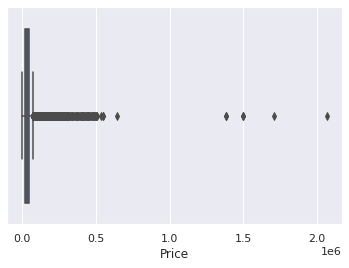

In [17]:
sns.boxplot(x=df['Price'])

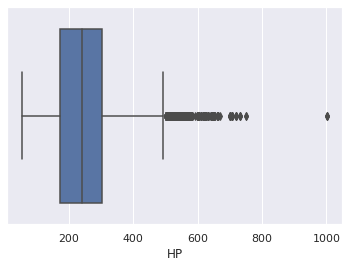

In [18]:
sns.boxplot(x=df['HP'])

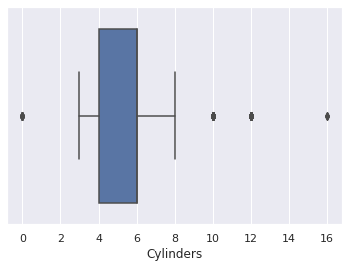

In [19]:
sns.boxplot(x=df['Cylinders'])

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64



# **Análisis univariante**


In [21]:
df.describe()

,Year,HP,Cylinders,MPG-H,MPG-C,Price
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


## **Transformación de variables**

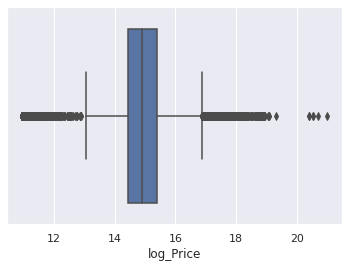

In [22]:
df["log_Price"] = np.log2(df["Price"])
sns.boxplot(x=df["log_Price"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


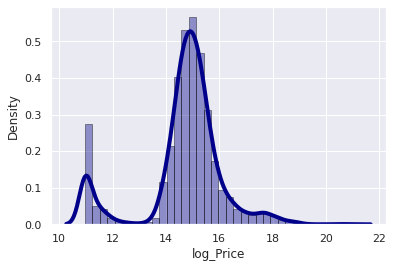

In [23]:
sns.distplot(df['log_Price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# **Análisis multivariante**
**texto en negrita**

### Histograma

El histograma de frecuencias se refiere a la frecuencia de aparición de las variables en un intervalo. En este caso, hay principalmente 10 tipos diferentes de empresas de fabricación de coches, pero a menudo es importante saber quién tiene el mayor número de coches. Para ello el histograma es una de las soluciones triviales que nos permite conocer el número total de coches fabricados por una empresa diferente.

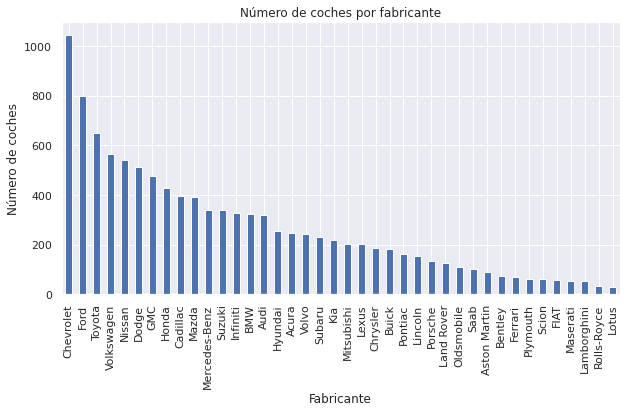

In [24]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Número de coches por fabricante")
plt.ylabel('Número de coches')
plt.xlabel('Fabricante');

### Mapas de calor
Una de las mejores maneras de encontrar la relación entre las características es utilizar mapas de calor (*Heat Map*). En el siguiente mapa de calor sabemos que la característica *Price* depende principalmente de las variables *Engine Size*, *Horsepower*, y *Cylinders.* 

,Year,HP,Cylinders,MPG-H,MPG-C,Price,log_Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789,0.717367
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835,0.684203
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740,0.404502
MPG-H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150,-0.074201
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050,-0.119183
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000,0.607241
log_Price,0.717367,0.684203,0.404502,-0.074201,-0.119183,0.607241,1.000000


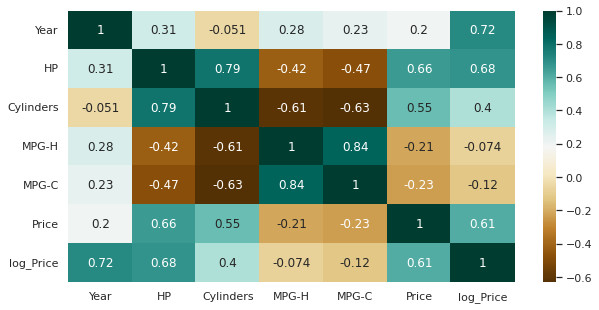

In [27]:
plt.figure(figsize=(10,5))
correlation= df.corr()
sns.heatmap(correlation,cmap="BrBG",annot=True)
correlation

### Scatterplot

Generalmente utilizamos los gráficos de dispersión (*scatterplot*) para encontrar la correlación entre dos variables. A modo de ejemplo, el gráfico de dispersión se traza entre las variables *Horsepower* y *Price*. Con el gráfico que se muestra a continuación, podemos trazar fácilmente una línea de tendencia. 

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

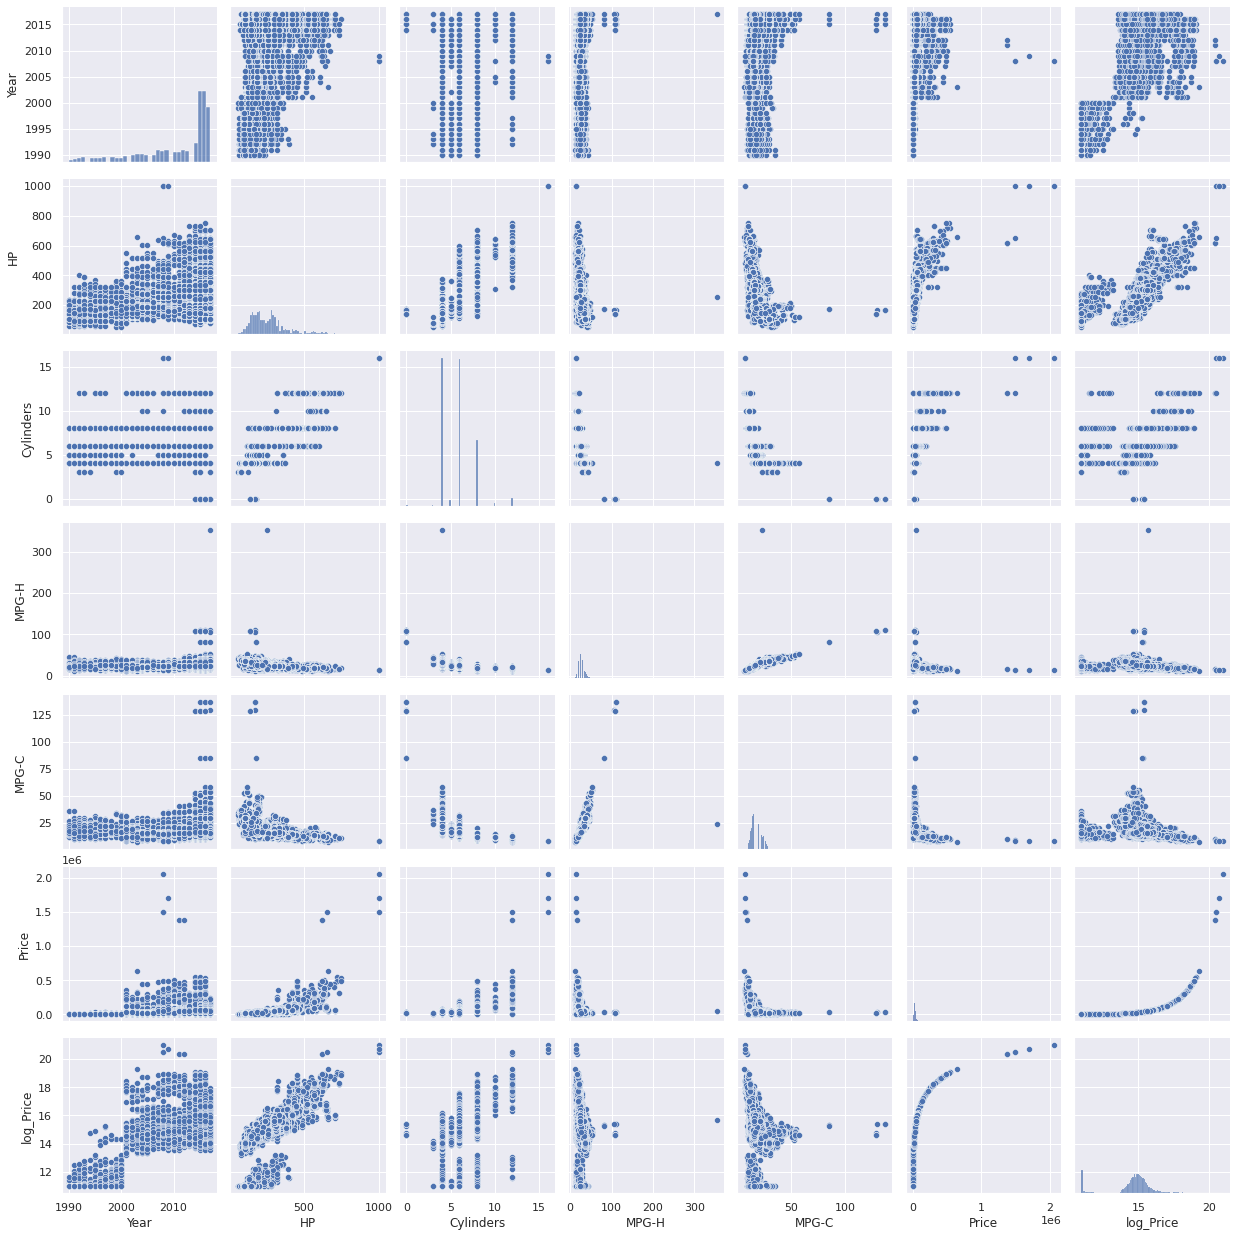

In [29]:
sns.pairplot(df)

## Boxplot

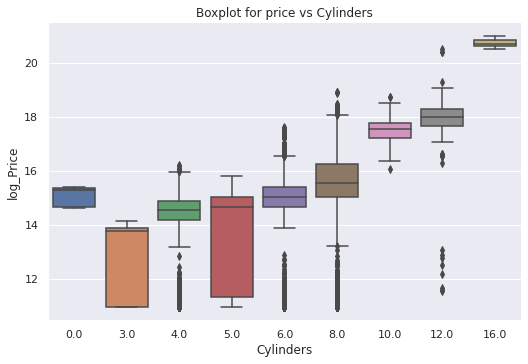

In [30]:
sns.catplot(x="Cylinders", y="log_Price", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for price vs Cylinders")
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


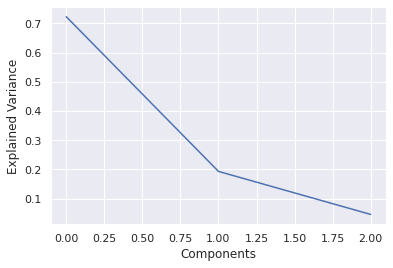

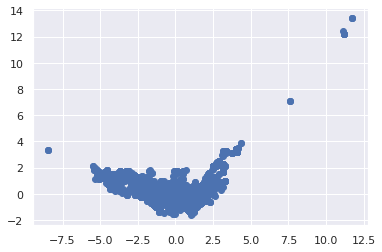

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot

df_normalized=(df - df.mean()) / df.std()
df_normalized.describe()
pca = PCA(n_components=3)
pca.fit(df_normalized[['MPG-C','MPG-H','HP','Cylinders']])


plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

from sklearn import decomposition

df2=df_normalized[['MPG-C','HP','Cylinders']]
m= 3
K = 2

# PCA (How I tend to set it up)
Mod_PCA = decomposition.PCA(n_components=m)
DF_PCA = pd.DataFrame(Mod_PCA.fit_transform(df2), 
                      columns=["PC%d" % k for k in range(1,m + 1)]).iloc[:,:K]
fig, ax = plt.subplots()
ax.scatter(x=DF_PCA["PC1"], y=DF_PCA["PC2"])

---
**DSLAB- Isaac Martín de Diego - 2022**